During your work with signal data, you might end up programming multiple functions and methods that can implement the process you want to use on the signal data. However, at some point, it might be hard to keep tracking the quality of your methods applied to signals without prior knowledge of this data. Therefore, generating signal data with prior known parameters helps you better understand your program and method. Generating signals, especially sinusoidal signals, is very common in signal processing studies. And it is usually done for testing or to represent the use of different signal processing techniques, such as Discrete Fourier Transform, Wavelet analysis, etc.

In this notebook, we will learn how to use classes to build a signal generator that you can use to generate sinusoidal signals for further understanding signal processing methods.


Let's start our coding journey with a simple code that generate a sinusoidal signal.

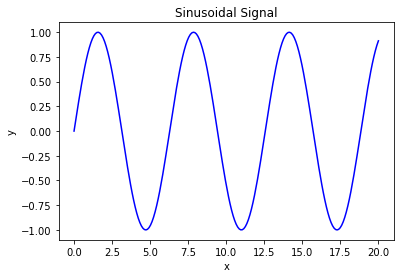

In [ ]:
# Import the required package
import numpy as np
import matplotlib.pyplot as plt

# Generate the x-axis (from 0 to 1 with step of 1/200)
x = np.linspace(0,20,200)
# Generate a sinusoidal 1D Array
y = np.sin(x)

# Plot the result
plt.plot(x, y, 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sinusoidal Signal')
plt.show()

# **Why classes?**

From the code above, it seems we can generate signals without using classes. So, why the classes are a good choice? [[1]](https://docs.python.org/3/tutorial/classes.html)

- The data is more controllable when using classes as you can build your object and methods that can be applied to control and get the signals without repeat coding like the above.

- Using classes brings you more functionality. Classes allow you to define variables and functions as attributes.

- More readability and flexibility of your code. With classes, your code becomes easier to be understood and used.

- Classes play a major role in building packages. If you work a lot with signal data, you might consider building a special package that helps you with better and faster signal data analysis work.

[**"Think DSP"**](https://github.com/AllenDowney/ThinkDSP.git) is a great example of building a package specifically for Digital Signal Processing. Allen B. Downey has his thoughts and experience in signal processing implemented into this package, from generating signals to analyzing spectrums and more.

# **Classes, a Simple Start**

Defining a class is similar to defining functions. First, you need a proper name for your class. There are no such rules for naming a class but it's preferred to be short and related to its functionality. Also, it's common. Let's define a class for our signal generator.

In [ ]:
# Define a class
class Signal:
  # Statement 1
  # Statement 2

Different objects can be defined inside the class. These objects can be variables or functions and can be passed as methods or attributes of the class. Variables in our signal generator class might be the frequency and amplitude of the signal. Let's also define a function that prints these variables.

In [ ]:
# Signal Generator Class
class Signal:
  """
  Signal Generator
  """
  # Define the frequency
  f = 10 # in Hz
  # Define the amplitude
  a = 2

  # Print the variables
  def vars(self):
    print('frequency=', self.f)
    print('amplitude=', self.a)


In the code above, "self" represents the instance of the class and it's used to access the attributes of the class and to bind the attributes with the given arguments [[2]](https://www.geeksforgeeks.org/self-in-python-class/). You can use any word other than "self" as the name has absolutely no special meaning to Python. Note, however, that by not following the convention your code may be less readable to other Python programmers [[1]](https://docs.python.org/3/tutorial/classes.html). One last thing about the code above is the statement directly after defining the class. This is the documentation that describes the functionality of the class. It's important to be implemented in your class as it makes your code more readable. The user of the class can access the documentation using the help function in python.

The code below represents how to access the variables or the functions of a class.


In [ ]:
# Define a signal object
signal = Signal()
# Print the frequency of the signal
print(signal.f)
# Calling vars to print the Signal class variables
signal.vars()

10
frequency= 10
amplitude= 2


# **A Special Method for Classes**
Until now, not much flexibility has been presented by the classes above. But, fortunately, Python provides special methods that can be used to make the class more controllable. The most important method that we will discuss is the init() method. It is used to instantiate the class and its parameters customized to a specific initial state. With that in mind, calling a class object will automatically invoke the init method and instantiate all the variables and functions implemented into the init method [[1]](https://docs.python.org/3/tutorial/classes.html). The code below is a modification done on the previous code by defining the init method.

In [ ]:
# Signal Generator class
class Signal:
  """
  Signal Generator
  """

  # Initialize the class object
  def __init__(self, f, a):
    self.frequency = f
    self.amplitude = a
  
  # Print the varibles
  def vars(self):
    print('frequency=', self.frequency)
    print('amplitude=', self.amplitude)

Now if we try to define a Signal object, we need to pass the frequency and the amplitude of the signal.

In [ ]:
# Define a signal object
signal = Signal(f=10, a=2)
# Print the frequency of the signal
print(signal.frequency)
# Calling vars to print the Signal class variables
signal.vars()

10
frequency= 10
amplitude= 2


Now that we understand how to define classes and their objects along with the special initializing method. It's time to build the signal generator class that we want from the beginning. First, we need to point out the parameters we will implement in the init() method. The general form of a sinusoidal wave can be given following the equation [[3]](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.01-The-Basics-of-waves.html):
$$y(t)=A.sin(2\pi f+\phi)$$
where:
- $A$: The amplitude of the signal
- $f$: The frequency of the signal [Hz]
- $\phi$: The phase of the signal

Two additional parameters should be added to our variables:
- The duration of the signal, in seconds
- The sampling rate, samples per second


In [ ]:
# Building a class Signal for better use.
class Signal:
  """
  Generate sinusoidal signals with specific ampltiudes, frequencies, duration,
  sampling rate, and phase.

  Example:
    signal = Signal(amplitude=10, sampling_rate=2000.0)
    sine = signal.sine()
    cosine = signal.cosine()
  """

  def __init__(self, amplitude=1, frequency=10, duration=1, sampling_rate=100.0, phase=0):
    """
    Initialize the Signal class.

    Args:
        amplitude (float): The amplitude of the signal
        frequency (int): The frequency of the signal Hz
        duration (float): The duration of the signal in second
        sampling_rate (float): The sampling per second of the signal
        phase (float): The phase of the signal in radians
    
    Additional parameters,which are required to generate the signal, are
    calculated and defined to be initialized here too:
        time_step (float): 1.0/sampling_rate
        time_axis (np.array): Generate the time axis from the duration and
                              the time_step of the signal. The time axis is
                              for better representation of the signal.
    """
    self.amplitude = amplitude
    self.frequency = frequency
    self.duration = duration
    self.sampling_rate = sampling_rate
    self.phase = phase
    self.time_step = 1.0/self.sampling_rate
    self.time_axis = np.arange(0, self.duration, self.time_step)
  
  # Generate sine wave
  def sine(self):
    """
    Method of Signal

    Returns:
        np.array of sine wave using the pre-defined variables (amplitude,
        frequency, time_axis, and phase)
    """
    return self.amplitude*np.sin(2*np.pi*self.frequency*self.time_axis+self.phase)
  
  # Generate cosine wave
  def cosine(self):
    """
    Method of Signal

    Returns:
        np.array of cosine wave using the pre-defined variables (amplitude,
        frequency, time_axis, and phase)
    """
    return self.amplitude*np.cos(2*np.pi*self.frequency*self.time_axis+self.phase)

# **Let's Use our Signal Class**

Suppose we want to generate a signal that is the sum of three sinusoidal signals. The frequencies of these three signals are (20, 2, 7)Hz, respectively. The amplitudes of these three signals are (2, 6, 1), respectively. The sampling rate of the signals is 1000. And lastly, the duration of the signals is 3 seconds. Let's leave the phase of the signals as it is, 0.



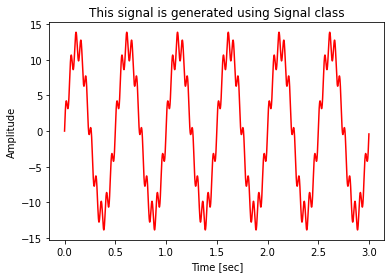

In [ ]:
# Define the first signal, 20Hz and amplitude of 2
s1 = Signal(amplitude=2, frequency=20, sampling_rate=1000.0, duration=3)
sine1 = s1.sine()

# Define the second signal, 2Hz and amplitude of 6
s2 = Signal(amplitude=6, frequency=2, sampling_rate=1000.0, duration=3)
sine2 = s2.sine()

# Define the second signal, 7Hz and amplitude of 1
s3 = Signal(amplitude=1, frequency=7, sampling_rate=1000.0, duration=3)
sine3 = s2.sine()

# Our signal is the sum of the three signals
signal = sine1 + sine2 + sine3

# Plot the signal
plt.plot(s1.time_axis, signal, 'r')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.title('This signal is generated using Signal class')
plt.show()

# **References**

[[1]](https://docs.python.org/3/tutorial/classes.html) Python Documentation, Classes, A First Look at Classes. [Accessed at 28/1/2023]

[[2]](https://www.geeksforgeeks.org/self-in-python-class/) GeeksforGeeks, Classes, Self in Classes. [Accessed at 28/1/2023]

[[3]](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.01-The-Basics-of-waves.html) Kong, Q., Siauw, T., & Bayen, A. (2020). Python programming and numerical methods: A guide for engineers and scientists, Fourier Transform, The Basics of waves. Academic Press.